# TRABALHO COMPUTACIONAL 2 - PARTE 2

 ## ALUNOS:

  ### Gabriel Almeida Rodrigues Pereira - RA: 143229
  ### Jonatas Carrocine - RA: 143472
  ### Nathalia Cristina Pires Vidal - RA: 139958

## 1.
Vant-Hull (1976) obteve a seguinte equação para a concentração geométrica do fator C no estudo da energia solar:

$$C = \frac{\pi\left(\frac{h}{\cos(A)}\right)^2*F}{0.5\pi D^2(1 + \sin(A) - 0.5\cos(A))}$$

Dado $h=290$, $C=1100$, $F=0.7$ e $D=13$, qual é o valor de $A$?

### Solução

 - Utilizando o método da secante e ao colocar o programa para chutar valores iniciais em graus, temos :
  - O melhor valor de A em radianos é: 0.8348829286621946
  - O melhor valor de A em graus é: 47.83526819986554
  - Número de iterações para o melhor resultado: 7

O melhor valor de A foi encontrado após otimizarmos para que o v alor esteja proximo de 45 graus.

In [ ]:
import math

In [ ]:
# Valores dados
h = 290
C = 1100
F = 0.7
D = 13

# Intervalo de busca para chutes iniciais (em graus)
min_angle = 0
max_angle = 90

#Critérios impostos
tolerancia = 1e-6
max_iteracoes = 100
pi = 3.14159265359

# Lista de chutes iniciais
num_chutes = 10
initial_guesses = [min_angle + (max_angle - min_angle) * i / (num_chutes - 1) for i in range(num_chutes)]

# Método da secante para encontrar A para cada chute inicial
results = []


In [ ]:
# Função
def func(A):
  global F, D, h, C, pi
  return (pi * ((h/math.cos(A))**2)*F) / (0.5 * pi * D**2 * (1 + math.sin(A) - 0.5 * math.cos(A))) - C

In [ ]:
for initial_guess in initial_guesses:
    A0 = math.radians(initial_guess)
    A_prev = A0
    A_current = A0 + 0.01
    iteration = 0
    absoluto = 0

    while iteration < max_iteracoes:
        if (abs(func(A_current)) > tolerancia):
          #print(f'MAX -> {max_iteracoes} | ITERACOES -> {iteration}')
          if (func(A_current) - func(A_prev)) == 0:
            iteration += 1
          else:
            A_next = A_current - (func(A_current)) * (A_current - A_prev) / (func(A_current) - func(A_prev))
            A_prev = A_current
            A_current = A_next
            iteration += 1
        else:
          break


    # Converter o resultado de radianos para graus
    if iteration > 0:
      A_result_deg = math.degrees(A_current)
      results.append((A_current, A_result_deg, iteration))



In [ ]:
# Encontrar o melhor resultado- otimização
best_result = min(results, key=lambda x: abs(x[1] - 45))

print("O melhor valor de A em radianos é:", best_result[0])
print("O melhor valor de A em graus é:", best_result[1])
print("Número de iterações para o melhor resultado:", best_result[2])


O melhor valor de A em radianos é: 0.8348829286621946
O melhor valor de A em graus é: 47.83526819986554
Número de iterações para o melhor resultado: 7


In [ ]:
# Função que representa a equação
def equation(A):
    return (math.pi * ((h / math.cos(A)) ** 2) * F) / (0.5 * math.pi * D ** 2 * (1 + math.sin(A) - 0.5 * math.cos(A))) - C

# Chute inicial para A (em radianos)
A0 = math.radians(30)  # Um valor inicial razoável

# Chute inicial para A -1 (em radianos)
A_minus1 = math.radians(60)  # Um valor inicial razoável próximo ao A0

# Método da secante
for i in range(max_iteracoes):
    A_next = A0 - equation(A0) * (A0 - A_minus1) / (equation(A0) - equation(A_minus1))

    # Verifica se a diferença entre A_next e A0 é menor que a tolerância
    if abs(A_next - A0) < tolerancia:
        break

    # Atualiza os valores de A
    A_minus1 = A0
    A0 = A_next

# Converter o resultado de radianos para graus
A_solution_degrees = math.degrees(A_next)

print(f"O valor de A é aproximadamente {A_solution_degrees} graus após {i+1} iterações.")


O valor de A é aproximadamente 47.83526819981843 graus após 10 iterações.


## 2.

Em engenharia ambiental, a seguinte equação pode ser usada para calcular o nível de concentração de oxigénio C num rio, em função da distância x, medida a partir do local de descarga de poluentes

$$c(x) = 10 - 20 ({e^{-0.2x} - e^{-0.75x}}) $$

Calcule a distância para a qual o nível de oxigénio desce para o valor 5

### Solução
Para este exercício, vamos utilizar o Método de Newton.
Sua função derivada é

$$c'(x) = {4e^{-0.2x} - 15e^{-0.75x}} $$

Além disso, como o exercício considera que o nível de oxigênio, devemos subtrair 5 na função $c(x)$ na implementação do algoritmo

- Considerando este método, e o valor inicial $x_0 = 1$, temos para a 1ª iteração:

$$c(x) = 10 - 20 ({e^{-0.2} - e^{-0.75}}) ≈ -1.92728 $$
$$c'(x) = {4e^{-0.2x} - 15e^{-0.75x}} ≈ -3.81057 $$

$$ x_1 = x_0 - \frac{-1.92728}{-3.81057} ≈ 0,494227 $$

Com isso, com o auxílio do código para implementar o problema, temos que a distância é de aproximadamente $0.602355$ para que o nível de oxigênio desça para o valor $5$, depois de 4 iterações.



### Código

In [ ]:
import math

def c(x):
    return 10 - 20 * (math.exp(-0.2 * x) - math.exp(-0.75 * x)) #equacao

def c_derivada(x):
    return 4 * math.exp(-0.2 * x) - 15 * math.exp(-0.75 * x) #derivada da equacao

In [ ]:
#constantes
v_inicial = 1

In [ ]:
def newton(x0, tol, max_iter):
    global iter
    x = x0
    for iter in range(max_iter):
        f_x = c(x) - 5
        f_prime_x = c_derivada(x)
        print(f"valor de x: {x}, \t x_atual: {f_x}, \t x_derivada: {f_prime_x}")
        x = x - f_x / f_prime_x
        if abs(f_x) < tol:
            return x
    return x

resultado = newton(v_inicial, tolerancia, max_iteracoes)

valor de x: 1, 	 x_atual: -1.9272840067393426, 	 x_derivada: -3.810575278803293
valor de x: 0.4942275468326126, 	 x_atual: 0.6877718074754835, 	 x_derivada: -6.73053797918106
valor de x: 0.596414297669307, 	 x_atual: 0.035770132156550005, 	 x_derivada: -6.039951424236424
valor de x: 0.6023365526088112, 	 x_atual: 0.00011350061847714699, 	 x_derivada: -6.001651854681182
valor de x: 0.6023554641720318, 	 x_atual: 1.1536815947010837e-09, 	 x_derivada: -6.001529846678199


In [ ]:
print(f"Quantidade de iterações: {iter}")
print("Aproximação da distância x:", round(resultado, 6))


Quantidade de iterações: 4
Aproximação da distância x: 0.602355


## 3
Uma das formas da equação de Colebrook para calcular o fator de atrito $f$ é dado por

$$\frac{1}{\sqrt{f}} = -2\log_{10}*\left(\frac{𝜀/D_H}{3,7} + \frac{2,51}{Re\sqrt{f}}\right) $$

onde $f$ é o fato de atrito, $ε$ é a rugosidade, $D_H$ é o diâmetro hidráulico, $Re$ o número de Reynolds. Encontre o valor de $f$ para os seguintes valores de $Re$ e  $ε/DH$ :

$$ Re=3*10^5;  ε/D_H = 0.0001 $$

$$ Re=1*10^4;  ε/D_H = 0.03 $$

$$ Re=3*10^5;  ε/D_H = 0.01 $$



Para essa solução, criamos uma função no códiogo para calcular o valor de f com base nos valores fornecidos. Assim, encontramos:

 - Para $Re = 300000.0$ e $epsilon/DH = 0.0001$, $f = 0.015431$
 - Para $Re = 10000.0$ e $epsilon/DH = 0.03$, $f = 0.060106$
 - Para $Re = 300000.0$ e $epsilon/DH = 0.01$, $f = 0.038106$


In [ ]:
#Valores fornecidos
Re1 = 3e5
edh1 = 0.0001
Re2 = 1e4
edh2 = 0.03
Re3 = 3e5
edh3 = 0.01

x0 = 0.01
tolerance = 1e-6
max_iterations = 100

In [ ]:
import math

# Defina a função f(x)
def f(x, Re, edh):
    return 1 / (math.sqrt(x)) + 2 * math.log10(edh / 3.7 + 2.51 / (Re * math.sqrt(x)))

# Derivada da função f(x)
def f_prime(x, Re, edh):
    return -0.5 / (x ** 1.5) - (2.51 / (Re * x ** 1.5)) / (edh / 3.7 + 2.51 / (Re * math.sqrt(x)))

# Método de Newton-Raphson
def newton_raphson(f, f_prime, x0, tol, max_iter, Re, edh):
    x = x0
    for i in range(max_iter):
        fx = f(x, Re, edh)
        if abs(fx) < tol:
            return x
        x = x - fx / f_prime(x, Re, edh)
    return x

In [ ]:
result1 = newton_raphson(f, f_prime, x0, tolerance, max_iterations, Re1, edh1)
result2 = newton_raphson(f, f_prime, x0, tolerance, max_iterations, Re2, edh2)
result3 = newton_raphson(f, f_prime, x0, tolerance, max_iterations, Re3, edh3)
print(f"Para Re = {Re1} e epsilon/DH = {edh1}, f = {result1:.6f}")
print(f"Para Re = {Re2} e epsilon/DH = {edh2}, f = {result2:.6f}")
print(f"Para Re = {Re3} e epsilon/DH = {edh3}, f = {result3:.6f}")

Para Re = 300000.0 e epsilon/DH = 0.0001, f = 0.015431
Para Re = 10000.0 e epsilon/DH = 0.03, f = 0.060106
Para Re = 300000.0 e epsilon/DH = 0.01, f = 0.038106


## 4

Encontre os pontos de intersecção entre a parábola
$$ y = x^2 + 1 $$
e a elipse
$$ x^2 + y^2/4 = 1 $$
seguindo os seguintes passos:

*   Faça um esboço das duas curvas e entenda o problema. Verifique que existem dois pontos de intersecção, um no primeiro quadrante e outro no segundo quadrante do plano $xy$
*   A partir de seu esboço, encontre aproximações para $x$ e $y$ em cada ponto
*   Escreva o problema na forma:


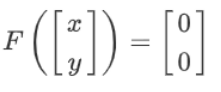

- Encontre a jacobiana $J_F$
- Construa a iteração do método de Newton
- Implemente no computador.

###Solução

Primeiramente, fizemos o esboço das duas curvas para verificarmos os dois pontos de intersecção. Assim, encontramos:
 - As curvas possuem dois pontos de intersecção, um no primeiro quadrante e outro no segundo quadrante. A posição exata destes pontos de intersecção é dada por:
  - Ponto de intersecção 1: x = 0.6813, y =  1.4641
  - Ponto de intersecção 2: x = -0.6813, y = 1.4641

O esboço das duas curvas:

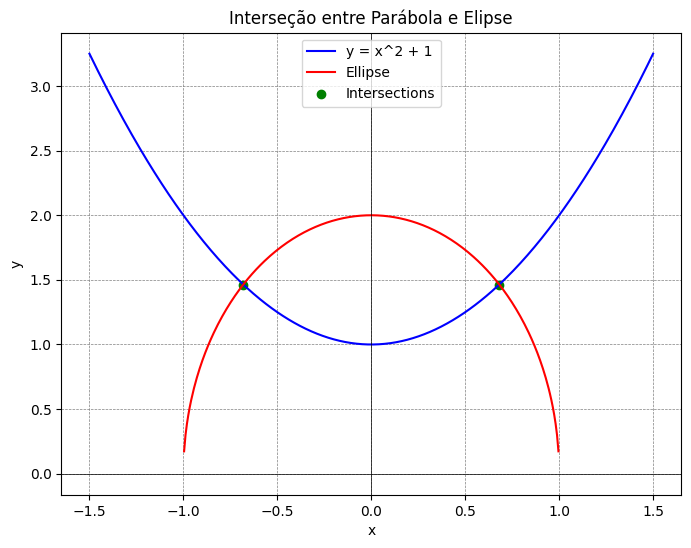



Ajustando as aproximações iniciais para (0.5, 1.5), (-0.5, 1.5) e usando o método de Newton, temos:

 - Ponto de interseção 1: x = 0.6813, y = 1.4611
 - Ponto de interseção 2: x = -0.6813, y = 1.4611


Assim, concluimos que o valor encontrado pelo método de Newton, chega bem próximo dos valores que foram encontradas atraves do gráfico:
 - Ponto de intersecção 1: x = 0.6813, y =  1.4641
 - Ponto de intersecção 2: x = -0.6813, y = 1.4641


###Código para geração do gráfico

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt



<ipython-input-14-87078d69e6fe>:5: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(1 - x**2)


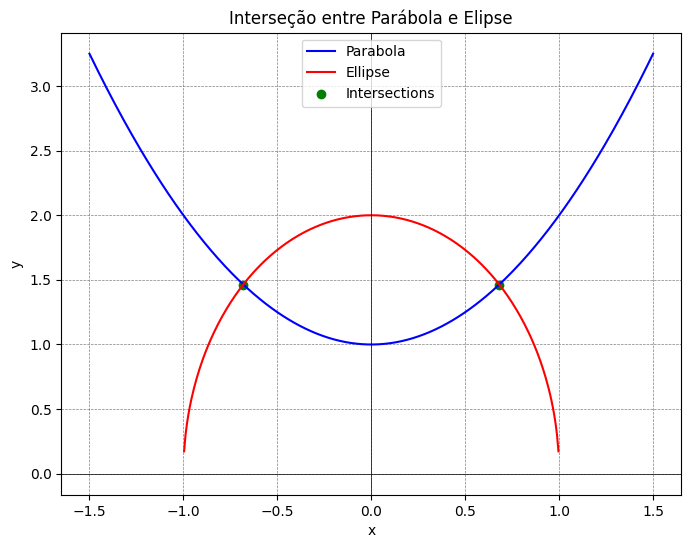

Ponto de intersecção 1: x = 0.6813, y =  1.4641
Ponto de intersecção 2: x = -0.6813, y = 1.4641


In [ ]:

def parabola(x):
    return x**2 + 1

def ellipse(x):
    return 2 * np.sqrt(1 - x**2)

def equation(x):
    return parabola(x) - ellipse(x)

x1 = fsolve(equation, 0.5) #intersecções
x2 = fsolve(equation, -0.5)

y1 = parabola(x1)
y2 = parabola(x2)

x_values = np.linspace(-1.5, 1.5, 400)


y_parabola = parabola(x_values)
y_ellipse = ellipse(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_parabola, label='Parabola', color='blue')
plt.plot(x_values, y_ellipse, label='Ellipse', color='red')

plt.scatter([x1, x2], [y1, y2], color='green', label='Intersections')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interseção entre Parábola e Elipse')

plt.show()

print(f"Ponto de intersecção 1: x = {x1[0]:.4f}, y = {y1[0]: .4f}")
print(f"Ponto de intersecção 2: x = {x2[0]:.4f}, y = {y2[0]:.4f}")


###Código método de Newton

Agora, após encontrar a jacobiana  JF e utilizando o método de Newton para encontrar os valores das intersecções, temos:

In [ ]:
def F(xy):
    x, y = xy
    f1 = x**2 + 1 - 2 * np.sqrt(1 - x**2)
    f2 = x**2 + 1 - 2 * np.sqrt(1 - x**2)
    return [f1, f2]

In [ ]:
# Jacobiana de F(x, y)
def JF(xy):
    x, y = xy
    df1_dx = 2 * x + 2 * x / np.sqrt(1 - x**2)
    df2_dx = 2 * x + 2 * x / np.sqrt(1 - x**2)
    return [[df1_dx, 0], [df2_dx, 0]]

In [ ]:

aprox_inicial = [(0.5, 1.5), (-0.5, 1.5)]

#  Usando o método de Newton para encontrar os pontos de intersecção
solutions = [fsolve(F, guess, fprime=JF) for guess in aprox_inicial]


In [ ]:
for i, solution in enumerate(solutions):
    x, y = solution
    print(f"Ponto de interseção {i + 1}: x = {x:.4f}, y = {y:.4f}")


Ponto de interseção 1: x = 0.6813, y = 1.4611
Ponto de interseção 2: x = -0.6813, y = 1.4611


## 5

Encontre uma aproximação com erro inferior a $10^{-5}$ em cada incógnita para a solução próxima da origem do sistema

$$ 6x - 2y + e^z = 2 $$
$$ sen(x) - y + z = 0 $$
$$ sen(x) + 2y +3z = 1 $$


###Solução

Utilizando o método de Newton para achar uma aproximação com erro inferior a  $10^{-5}$ em cada incógnita. Temos:
 - Solução aproximada:
  - $x = 0.2597510767602432$,
  - $y = 0.3027359948023063$,
  - $z = 0.045896007796540524$

 - Norma do vetor F na solução: 1.6393054844000992e-13
 - Número de iterações: 3

In [ ]:
import numpy as np

In [ ]:
def F(x, y, z):
    eq1 = 6 * x - 2 * y + np.exp(z) - 2
    eq2 = np.sin(x) - y + z
    eq3 = np.sin(x) + 2 * y + 3 * z - 1
    return np.array([eq1, eq2, eq3])

In [ ]:
#Jacobiana do sistema
def JF(x, y, z):
    df1dx = 6
    df1dy = -2
    df1dz = np.exp(z)

    df2dx = np.cos(x)
    df2dy = -1
    df2dz = 1

    df3dx = np.cos(x)
    df3dy = 2
    df3dz = 3

    return np.array([[df1dx, df1dy, df1dz],
                     [df2dx, df2dy, df2dz],
                     [df3dx, df3dy, df3dz]])

In [ ]:
# Chute inicial
x0, y0, z0 = 0, 0, 0

tolerance = 1e-5
max_iterations = 100

In [ ]:
# Método de Newton
for iteration in range(max_iterations):
    current_f = F(x0, y0, z0)
    current_jacobian = JF(x0, y0, z0)
    step = np.linalg.solve(current_jacobian, -current_f)

    # Atualiza as variáveis
    x0 += step[0]
    y0 += step[1]
    z0 += step[2]

    if np.linalg.norm(current_f) < tolerance:
        break

In [ ]:
print(f"Solução aproximada: x = {x0}, y = {y0}, z = {z0}")
print(f"Norma do vetor F na solução: {np.linalg.norm(F(x0, y0, z0))}")
print(f"Número de iterações: {iteration + 1}")


Solução aproximada: x = 0.2597510767602432, y = 0.3027359948023063, z = 0.045896007796540524
Norma do vetor F na solução: 1.6393054844000992e-13
Número de iterações: 3
